# Using pyRMatrix
## Loading an ENDF file 

In [1]:
import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/build/python')
import pyRMatrix
print(pyRMatrix.__file__)

# tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-029_Cu_063.endf'
tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf'
# tapename = '/home/sole-pie01/ndlib/jeff4t3-neutron/8-o-16g.jeff4t3'
# tapename = '/home/sole-pie01/ndlib/jeff4t3-neutron/45-rh-103g.jeff4t3'

# Read the ENDF file
# tape = ENDFtk.tree.Tape.from_file(tapename)
# mat_number = tape.material_numbers[0]
# mf2 = tape.MAT(mat_number).MF(2).MT(151).parse()
# resonance_range = mf2.isotopes[0].resonance_ranges[0]
compound_system = create_compound_from_ReichMoore(tapename)
compound_system.printSpinGroupInfo()

/home/sole-pie01/codes/NuclearDataModels/build/python/pyRMatrix.so


NameError: name 'create_compound_from_ReichMoore' is not defined

# Partial Fission

In [2]:
import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/build/python')
import pyRMatrix
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/scripts')

from compoundFromENDFtk import create_compound_from_ReichMoore

# Load the compound system
tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf'
compound_system = create_compound_from_ReichMoore(tapename)

# Energy in eV
energy = 0.1

# Get partial fission cross section for the first spin group (index 0)
partial_fission_xs = compound_system.spinGroupFissionCrossSection(0, energy)

print(f"Partial fission cross section for first J group at {energy} eV: {partial_fission_xs} barns")

# You can also get other partial cross sections for the first spin group:
partial_elastic_xs = compound_system.spinGroupElasticCrossSection(0, energy)
partial_capture_xs = compound_system.spinGroupCaptureCrossSection(0, energy)
partial_total_xs = compound_system.spinGroupTotalCrossSection(0, energy)

print(f"Partial elastic XS: {partial_elastic_xs} barns")
print(f"Partial capture XS: {partial_capture_xs} barns")
print(f"Partial total XS: {partial_total_xs} barns")

# Compare with total (summed over all spin groups)
total_fission_xs = compound_system.fissionCrossSection(energy)
print(f"Total fission XS (all J groups): {total_fission_xs} barns")

print(f"Total XS (all J groups): {compound_system.crossSection(energy)} barns")

Partial fission cross section for first J group at 0.1 eV: 272.9486360637568 barns
Partial elastic XS: 4.072500459701963 barns
Partial capture XS: 222.38061505760743 barns
Partial total XS: 499.40175158106615 barns
Total fission XS (all J groups): 477.190156193324 barns
Total XS (all J groups): 716.7677178664512 barns


## Parse a LRF3 section to a dictionnary
Such a section can be converted to R-Matrix parameters, assuiming the conservation of s and l

In [2]:
import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/build/python')
import pyRMatrix
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/scripts')

from compoundFromENDFtk import create_compound_from_ReichMoore

tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf'
compound_system = create_compound_from_ReichMoore(tapename)
print(compound_system.crossSection(0.1))  # Calculate cross section at 1.0 eV
# compound_system.printSpinGroupInfo()

0.0
TotalX = 499.402
Elastic xs=4.0725
Capture xs=222.381
fission xs=272.949
TotalX = 217.366
Elastic xs=3.46974
Capture xs=9.6547
fission xs=204.242


In [5]:
232.035 - 222.381

9.653999999999996

## Parse a LRF7 section to a dictionnary

In [8]:
import sys
import os
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/scripts')
from compoundFromENDFtk import create_compound_from_RMatrix
# Read the ENDF file
tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-029_Cu_063.endf'

compound_system = create_compound_from_RMatrix(tapename)
# Now you can use the compound_system object
# print(f"Number of spin groups: {len(compound_system.spinGroups())}")
compound_system.printSpinGroupInfo()
# compound_system.crossSection(0.1)  # Calculate cross section at 1.0 eV

Spin Group 0/6 (1, -1): has 2 channels.
Resonance -37843.8 0.5 86.2045 
Resonance -266.714 0.5 11.2307 
Resonance 650.722 0.5 0.40079 
Resonance 2047.72 0.5 16.34 
Resonance 3308.8 0.5 0.368882 
Resonance 3501.42 0.5 0.379536 
Resonance 4395.98 0.5 4.61953 
Resonance 4434.96 0.5 0.405086 
Resonance 4854.6 0.5 8.37948 
Resonance 5398.48 0.5 13.2845 
Resonance 6838.43 0.5 0.940576 
Resonance 7563.27 0.5 8.38432 
Resonance 8626.68 0.5 0.842879 
Resonance 8647.26 0.5 0.724364 
Resonance 9759.16 0.5 0.817196 
Resonance 9919.92 0.5 17.4646 
Resonance 10309 0.5 0.801954 
Resonance 13702.2 0.5 11.3852 
Resonance 15090.6 0.5 8.43916 
Resonance 15805.7 0.5 5.54331 
Resonance 17863.6 0.5 15.5509 
Resonance 18340.4 0.5 0.074848 
Resonance 20389.3 0.5 1.40909 
Resonance 20444.1 0.5 0.437359 
Resonance 20919.2 0.5 1.20535 
Resonance 21015.5 0.5 11.9183 
Resonance 21522.2 0.5 0.552078 
Resonance 23625.5 0.5 3.14247 
Resonance 25748.1 0.5 22.6926 
Resonance 29529.6 0.5 28.2794 
Resonance 29930.9 0.5 0

In [4]:
compound_system.printSpinGroupInfo()

Spin Group 0/2 (1, 1): has 4 channels.
Resonance -150.02 2.71848 0.260041 0 0.153068 
Resonance -8.06856 0.112299 -0.0276438 0 0.157537 
Resonance 0.295624 0.18842 0.167626 0 0.14111 
Resonance 7.8158 0.264599 -0.149563 0 0.138924 
Resonance 10.928 0.364473 -0.278646 0 0.135133 
Resonance 11.898 0.262617 0.10165 0 0.137857 
Resonance 14.329 0.197542 0.171373 0 0.120349 
Resonance 14.678 0.349131 0.124406 0 0.140571 
Resonance 17.657 0.32318 -0.134598 0 0.138446 
Resonance 22.266 0.365272 -0.176315 0 0.144257 
Resonance 23.933 0.065154 0.116058 0 0.135965 
Resonance 26.269 0.270905 0.14019 0 0.139073 
Resonance 27.288 0.0834725 0.0361822 0 0.13905 
Resonance 35.486 0.106277 0.0401935 0 0.140607 
Resonance 41.457 0.35359 -0.0569918 0 0.156616 
Resonance 41.736 0.187884 0.176608 0 0.137743 
Resonance 44.531 0.472902 -0.0475131 0 0.142348 
Resonance 50.144 0.330505 -0.0468826 0 0.104342 
Resonance 52.648 0.563182 -0.0691758 0 0.14938 
Resonance 55.704 0.220773 0.111599 0 0.136998 
Resonanc

2.589 0.13088 2.24959 -0.017775 0.140704 
Resonance 898.023 0.100608 0.324313 -0.14225 0.138449 
Resonance 906.245 0.747693 -1.84967 0.775564 0.142236 
Resonance 911.315 0.0850318 0.943346 0.353483 0.142228 
Resonance 912.883 0.593347 0.252099 1.26036 0.135444 
Resonance 925.816 0.315176 0.97858 0.0414005 0.145981 
Resonance 937.665 0.656743 -1.87075 -0.018711 0.141349 
Resonance 946.183 0.137313 1.43281 -0.61086 0.137429 
Resonance 972.16 0.600931 0.55655 0.0187896 0.113134 
Resonance 980.4 0.839147 -0.0450896 0.997747 0.152038 
Resonance 1002.79 0.644675 0.490307 0.2824 0.148607 
Resonance 1009.76 0.198556 1.274 0.000223607 0.140918 
Resonance 1025.47 0.469711 -0.362127 0.422847 0.170368 
Resonance 1048.1 0.855311 -0.921316 0.0645639 0.150904 
Resonance 1056.3 0.581644 0.06318 0.250799 0.145632 
Resonance 1071.72 0.173011 0.205457 0.000223607 0.14703 
Resonance 1073.22 0.275862 -0.103941 1.14149 0.138584 
Resonance 1077.49 0.129724 0.000223556 -0.166328 0.140605 
Resonance 1091.58 0.

In [8]:
# Collect particle pair data
particle_pairs = []
for ipp in range(resonance_range.parameters.particle_pairs.NPP):
    particle_pair = {
        'spinA': float(resonance_range.parameters.particle_pairs.IA[ipp]),
        'spinB': float(resonance_range.parameters.particle_pairs.IB[ipp]),
        'massA': float(resonance_range.parameters.particle_pairs.MA[ipp]),
        'massB': float(resonance_range.parameters.particle_pairs.MB[ipp]),
        'MT': int(resonance_range.parameters.particle_pairs.MT[ipp]),
        'parityA': int(resonance_range.parameters.particle_pairs.PA[ipp]),
        'parityB': int(resonance_range.parameters.particle_pairs.PB[ipp]),
        'PNT': int(resonance_range.parameters.particle_pairs.PNT[ipp]),
        'QI': float(resonance_range.parameters.particle_pairs.Q[ipp]),
        'SHF': int(resonance_range.parameters.particle_pairs.SHF[ipp]),
        'ZA': int(resonance_range.parameters.particle_pairs.ZA[ipp]),
        'ZB': int(resonance_range.parameters.particle_pairs.ZB[ipp])
    }
    particle_pairs.append(particle_pair)

# Collect spin group data
spin_groups = []
for iJP in range(resonance_range.parameters.NJS):
    spin_group = {
        'AJ': float(resonance_range.parameters.spin_groups[iJP].AJ),
        'PJ': int(resonance_range.parameters.spin_groups[iJP].PJ),
        'channels': [],
        'resonances': []
    }

    # Collect channel data
    for iCH in range(resonance_range.parameters.spin_groups[iJP].NCH
                     ):
        channel = {
            'PPI': resonance_range.parameters.spin_groups[iJP].channels.PPI[iCH],
            'channelSpin': resonance_range.parameters.spin_groups[iJP].channels.SCH[iCH],
            'effectiveChannelRadius': resonance_range.parameters.spin_groups[iJP].channels.APE[iCH],
            'L': resonance_range.parameters.spin_groups[iJP].channels.L[iCH]
        }
        spin_group['channels'].append(channel)

    # Collect resonance data
    for iREZ in range(resonance_range.parameters.spin_groups[iJP].NRS):
        resonance = {
            'Er': resonance_range.parameters.spin_groups[iJP].parameters.ER[iREZ],
            'width': resonance_range.parameters.spin_groups[iJP].parameters.GAM[iREZ]
        }
        spin_group['resonances'].append(resonance)

    spin_groups.append(spin_group)

# Combine all data into a single dictionary
data = {
    'particle_pairs': particle_pairs,
    'spin_groups': spin_groups
}

# Mass number of the target nucleus (can be extracted or set manually)
A = mf2.AWR

Here is the updated code to plot `Phase Shift`, `Penetration Factor`, and `Shift Factor` for each `l` of the spin group:



In [9]:
# particle_pairs are sorted and indexed as "PPI". Each channel is associated with particle_pairs[PPI].
particle_pairs = []
for ipp in range(resonance_range.parameters.particle_pairs.NPP):
    particle_pair = pyRMatrix.ParticlePair(
        float(resonance_range.parameters.particle_pairs.MA[ipp]), float(resonance_range.parameters.particle_pairs.MB[ipp]),
        float(resonance_range.parameters.particle_pairs.IA[ipp]), float(resonance_range.parameters.particle_pairs.IB[ipp]),
        float(resonance_range.parameters.particle_pairs.Q[ipp]),
        int(resonance_range.parameters.particle_pairs.PA[ipp]), int(resonance_range.parameters.particle_pairs.PB[ipp]),
        int(resonance_range.parameters.particle_pairs.MT[ipp])
    )
    particle_pairs.append(particle_pair)
    
spin_groups = []
for iJP in range(resonance_range.parameters.NJS):
    spin_group = {
        'AJ': float(resonance_range.parameters.spin_groups[iJP].AJ),
        'PJ': int(resonance_range.parameters.spin_groups[iJP].PJ),
        'channels': [],
        'resonances': []
    }

    # Collect channel data
    for iCH in range(resonance_range.parameters.spin_groups[iJP].NCH):
        particle_pair = pyRMatrix.Channel(
            particle_pairs[resonance_range.parameters.spin_groups[iJP].channels.PPI[iCH] - 1],
            resonance_range.parameters.spin_groups[iJP].channels.L[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APE[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APT[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.SCH[iCH]
            )
        spin_group['channels'].append(particle_pair)

    # Collect resonance data
    for iREZ in range(resonance_range.parameters.spin_groups[iJP].NRS):
        resonance = {
            'Er': resonance_range.parameters.spin_groups[iJP].parameters.ER[iREZ],
            'width': resonance_range.parameters.spin_groups[iJP].parameters.GAM[iREZ]
        }
        spin_group['resonances'].append(resonance)

    spin_groups.append(spin_group)

In [10]:
E = 1
spin_groups[1].getChannels()[1].PhaseShift(E, 1)

AttributeError: 'dict' object has no attribute 'getChannels'

In [ ]:
import ENDFtk
import numpy as np
import pyRMatrix
import matplotlib.pyplot as plt

# Assume 'data' dictionary is prepared as before

# Prepare ParticlePair instances
particle_pairs = []
for ipp in range(resonance_range.parameters.particle_pairs.NPP):
    particle_pair = pyRMatrix.ParticlePair(
        float(resonance_range.parameters.particle_pairs.MA[ipp]), float(resonance_range.parameters.particle_pairs.MB[ipp]),
        float(resonance_range.parameters.particle_pairs.IA[ipp]), float(resonance_range.parameters.particle_pairs.IB[ipp]),
        float(resonance_range.parameters.particle_pairs.Q[ipp]),
        int(resonance_range.parameters.particle_pairs.PA[ipp]), int(resonance_range.parameters.particle_pairs.PB[ipp]),
        int(resonance_range.parameters.particle_pairs.MT[ipp])
    )
    particle_pairs.append(particle_pair)

# Prepare SpinGroup instances
spin_groups = []
for iJP in range(resonance_range.parameters.NJS):
    spin_group = pyRMatrix.SpinGroup(
        float(resonance_range.parameters.spin_groups[iJP].AJ),
        int(resonance_range.parameters.spin_groups[iJP].PJ)
    )

    # Collect channel data
    for iCH in range(resonance_range.parameters.spin_groups[iJP].NCH):
        channel = pyRMatrix.Channel(
            particle_pairs[resonance_range.parameters.spin_groups[iJP].channels.PPI[iCH] - 1],
            resonance_range.parameters.spin_groups[iJP].channels.L[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APE[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.APT[iCH],
            resonance_range.parameters.spin_groups[iJP].channels.SCH[iCH]
        )
        spin_group.addChannel(channel)

    # Collect resonance data
    for iREZ in range(resonance_range.parameters.spin_groups[iJP].NRS):
        resonance = pyRMatrix.Resonance(
            resonance_range.parameters.spin_groups[iJP].parameters.ER[iREZ],
            resonance_range.parameters.spin_groups[iJP].parameters.GAM[iREZ]
        )
        spin_group.addResonance(resonance)

    spin_groups.append(spin_group)

# Define energy range
energies = np.linspace(resonance_range.EL, resonance_range.EH, 1000)  # Energies in MeV

# Plot the results for each spin group
for spin_group in spin_groups:
    # Compute Phase Shift, Penetration Factor, and Shift Factor for each channel
    phase_shifts = {ch.getL(): [ch.PhaseShift(E, ch.getL()) for E in energies] for ch in spin_group.getChannels()}
    penetration_factors = {ch.getL(): [ch.PenetrationFactor(E, ch.getL()) for E in energies] for ch in spin_group.getChannels()}
    shift_factors = {ch.getL(): [ch.ShiftFactor(E, ch.getL()) for E in energies] for ch in spin_group.getChannels()}

    # Plot the results
    plt.figure(figsize=(15, 10))

    # Plot Phase Shift
    plt.subplot(3, 1, 1)
    for l, shifts in phase_shifts.items():
        plt.plot(energies, shifts, label=f'l={l}')
    plt.title(f'Hardsphere Phase Shift vs Energy for Spin Group J={spin_group.getJ()}, PJ={spin_group.getPJ()}')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Phase Shift (radians)')
    plt.legend()

    # Plot Penetration Factor
    plt.subplot(3, 1, 2)
    for l, factors in penetration_factors.items():
        plt.plot(energies, factors, label=f'l={l}')
    plt.title(f'Penetration Factor vs Energy for Spin Group J={spin_group.getJ()}, PJ={spin_group.getPJ()}')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Penetration Factor')
    plt.legend()

    # Plot Shift Factor
    plt.subplot(3, 1, 3)
    for l, shifts in shift_factors.items():
        plt.plot(energies, shifts, label=f'l={l}')
    plt.title(f'Shift Factor vs Energy for Spin Group J={spin_group.getJ()}, PJ={spin_group.getPJ()}')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Shift Factor')
    plt.legend()

    plt.tight_layout()
    plt.show()

TypeError: addChannel(): incompatible function arguments. The following argument types are supported:
    1. (self: pyRMatrix.SpinGroup, arg0: pyRMatrix.Channel, arg1: bool) -> None

Invoked with: <pyRMatrix.SpinGroup object at 0x7f5f0f397430>, <pyRMatrix.Channel object at 0x7f5f0f2200b0>

In [ ]:
# Assume 'data' dictionary and 'A' value are prepared as before
calculator = pyRMatrix.CrossSectionCalculator(data, A)

energies = [1] # , 0.5, 1.0, 1.5, 2.0]  # Energies in MeV

# Compute cross sections for the specified reaction channel
reaction_channel = "(n,n)"  # or "(n,n)", "(n,g)", etc.
cross_sections = calculator.computeCrossSections(energies, reaction_channel)

# Now, 'cross_sections' is a list of cross section values corresponding to the 'energies' list
# for E, sigma in zip(energies, cross_sections):
#     print(f"Energy: {E} MeV, Cross Section: {sigma} barns")

E=1
Spingroup=0^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=0^1  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=-1^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=1^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 3 3
L size 1 1
Computing A=(I-RL)^-1...
Spingroup=2^0  (/5)
Channel (n,n) selected
Computing Penetration and Shift...
P = 
0
S = 
-nan
Computing L=S+iP...
L = 
(-nan,0)
R size 2 2
L size 1 1
Computing A=(I-RL)^-1...


## Plot Superposed Spin Group Elastic Cross Sections
Compare elastic cross sections for different J groups.

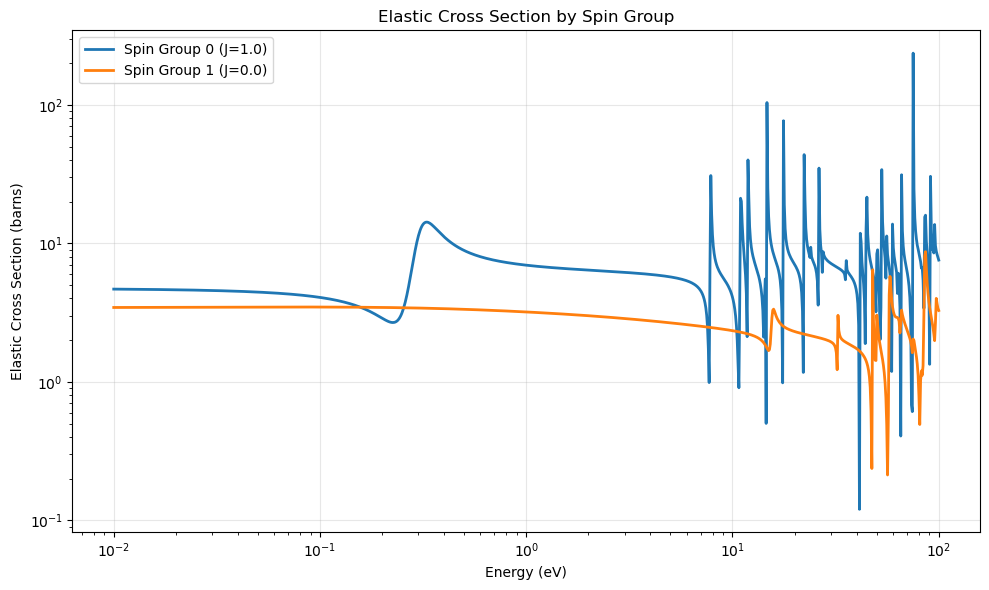

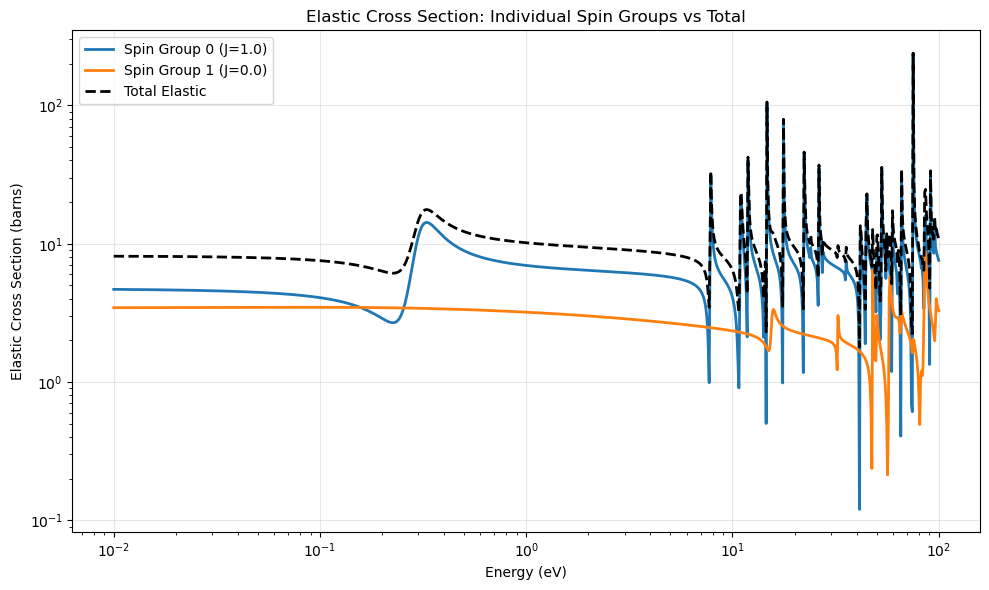

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import ENDFtk
import numpy as np
import sys
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/build/python')
import pyRMatrix
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/scripts')
from compoundFromENDFtk import create_compound_from_ReichMoore

# Load the compound system
tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf'
compound_system = create_compound_from_ReichMoore(tapename)

# Define energy range (in eV)
energies = np.logspace(-2, 2, 1000)  # From 0.01 eV to 100 eV

# Get elastic cross sections for first two spin groups
xs_spingroup_0 = compound_system.spinGroupElasticCrossSection(0, energies.tolist())
xs_spingroup_1 = compound_system.spinGroupElasticCrossSection(1, energies.tolist())

# Create the plot
plt.figure(figsize=(10, 6))
plt.loglog(energies, xs_spingroup_0, label=f'Spin Group 0 (J={compound_system.getSpinGroup(0).getJ()})', linewidth=2)
plt.loglog(energies, xs_spingroup_1, label=f'Spin Group 1 (J={compound_system.getSpinGroup(1).getJ()})', linewidth=2)

plt.xlabel('Energy (eV)')
plt.ylabel('Elastic Cross Section (barns)')
plt.title('Elastic Cross Section by Spin Group')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Also show the total elastic cross section for comparison
xs_total_elastic = compound_system.elasticCrossSection(energies.tolist())
plt.figure(figsize=(10, 6))
plt.loglog(energies, xs_spingroup_0, label=f'Spin Group 0 (J={compound_system.getSpinGroup(0).getJ()})', linewidth=2)
plt.loglog(energies, xs_spingroup_1, label=f'Spin Group 1 (J={compound_system.getSpinGroup(1).getJ()})', linewidth=2)
plt.loglog(energies, xs_total_elastic, label='Total Elastic', linewidth=2, linestyle='--', color='black')

plt.xlabel('Energy (eV)')
plt.ylabel('Elastic Cross Section (barns)')
plt.title('Elastic Cross Section: Individual Spin Groups vs Total')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Using the Plotting Utilities
Demonstrate the simplified plotting interface from `/scripts/plot_cross_sections.py`

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Nuclear Cross Sections by Reaction Type'}, xlabel='Energy (eV)', ylabel='Cross Section (barns)'>)

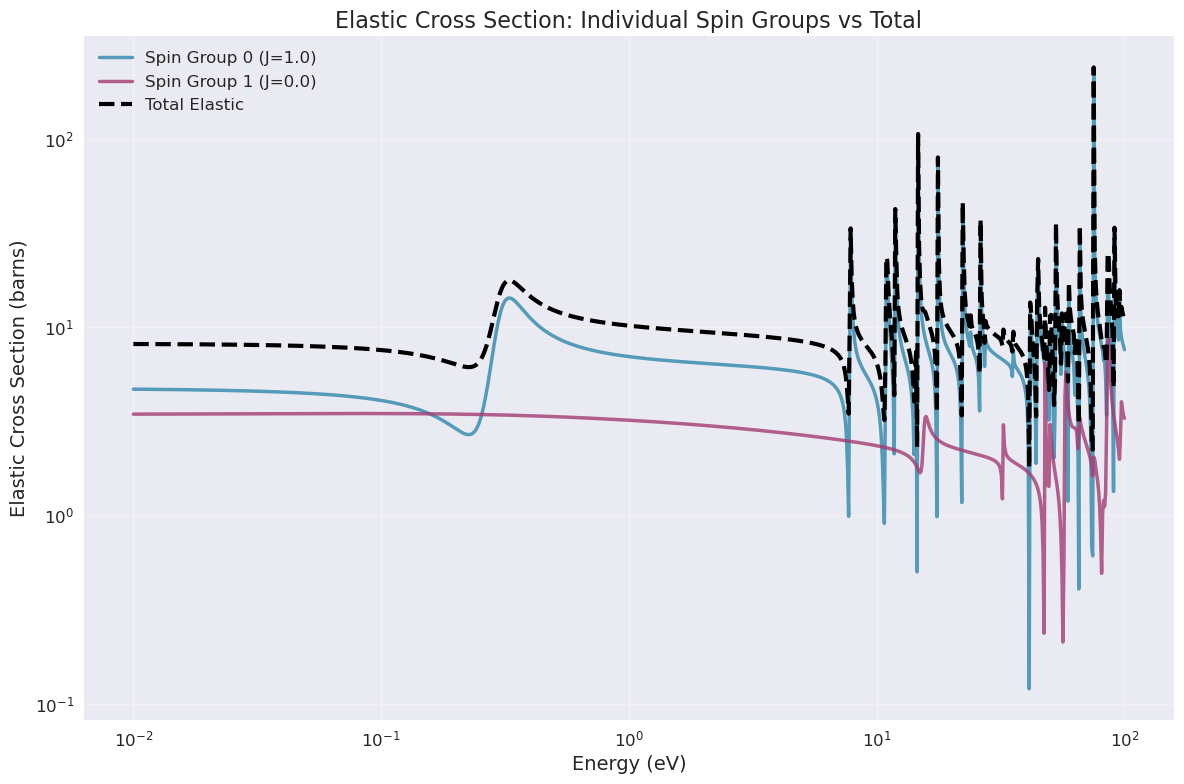

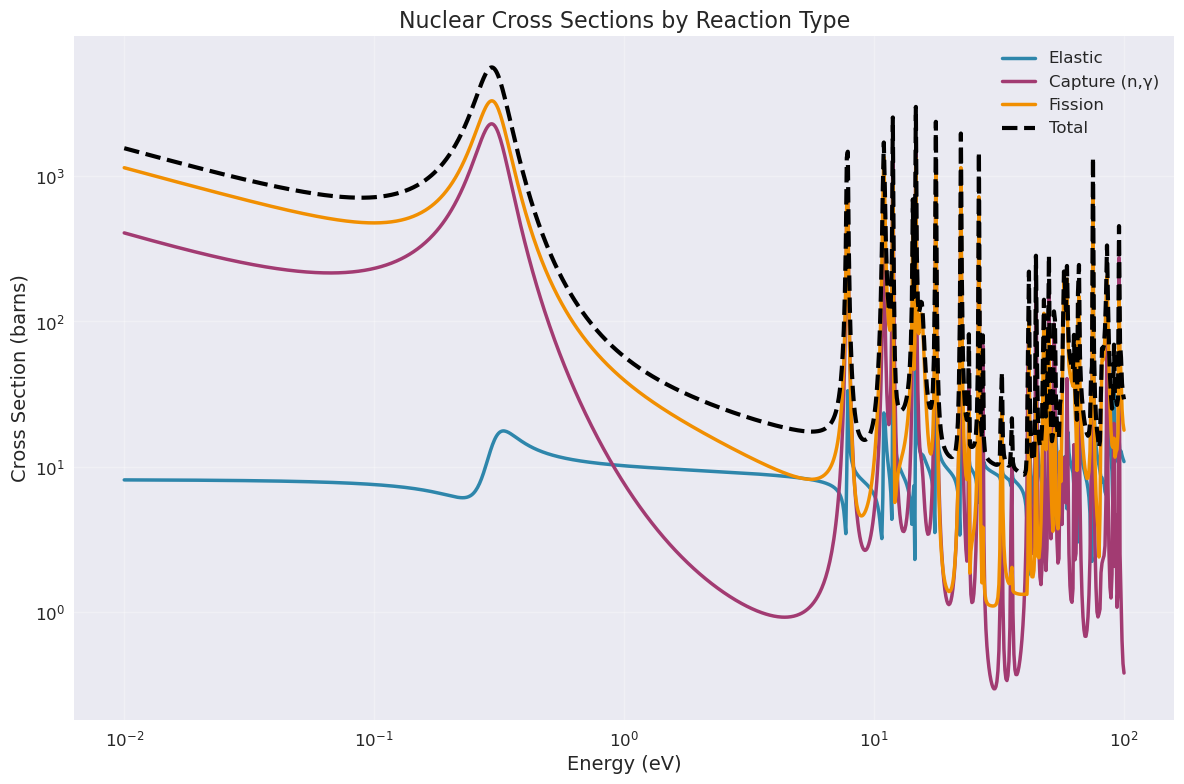

In [4]:
# Import the plotting utilities
sys.path.append('/home/sole-pie01/codes/NuclearDataModels/scripts')
from plot_cross_sections import *

# Ultra-simple plotting - just 2 lines!
tapename = '/home/sole-pie01/ndlib/endfb8-neutron/n-094_Pu_239.endf'
compound_system = create_compound_from_ReichMoore(tapename)

# One-liner to create publication-ready plots
plot_elastic_comparison(compound_system)

# Or plot all reaction types at once
plot_all_reactions(compound_system)

## Parameter Sensitivity Analysis
Compute numerical derivatives of cross sections with respect to all resonance parameters.

Parameters available for sensitivity analysis:

Computing sensitivity at 1.0 eV...


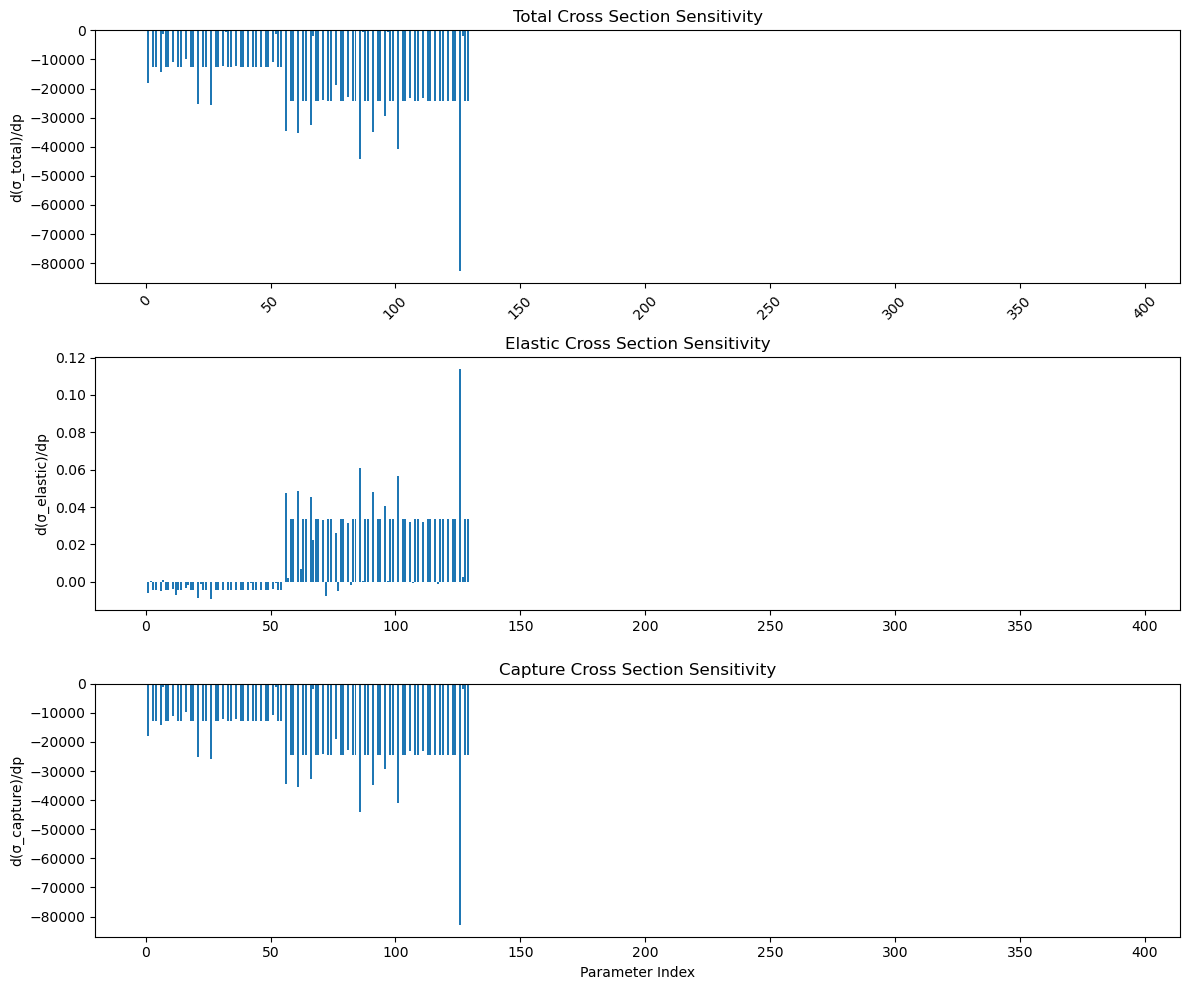

Computed sensitivity matrix for 50 energies and 395 parameters


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the compound system
tapename = '/home/sole-pie01/ndlib/jeff-40/13-Al-27g.txt'
compound_system = create_compound_from_ReichMoore(tapename)

# Create sensitivity analyzer
sensitivity = pyRMatrix.ParameterSensitivity(compound_system, perturbation=1e-6)

# Print parameter information
print("Parameters available for sensitivity analysis:")
sensitivity.printParameterInfo()

# Compute derivatives at specific energy
energy = 1.0  # eV
print(f"\nComputing sensitivity at {energy} eV...")

# Get derivatives for different cross section types
total_derivatives = sensitivity.totalCrossSectionDerivatives(energy)
elastic_derivatives = sensitivity.elasticCrossSectionDerivatives(energy)
capture_derivatives = sensitivity.captureCrossSectionDerivatives(energy)

# Get parameter info for plotting
parameters = sensitivity.getParameters()
param_names = [param.description for param in parameters]

# Plot sensitivity analysis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Total cross section derivatives
ax1.bar(range(len(total_derivatives)), total_derivatives)
ax1.set_title('Total Cross Section Sensitivity')
ax1.set_ylabel('d(σ_total)/dp')
ax1.tick_params(axis='x', rotation=45)

# Elastic cross section derivatives
ax2.bar(range(len(elastic_derivatives)), elastic_derivatives)
ax2.set_title('Elastic Cross Section Sensitivity')
ax2.set_ylabel('d(σ_elastic)/dp')

# Capture cross section derivatives
ax3.bar(range(len(capture_derivatives)), capture_derivatives)
ax3.set_title('Capture Cross Section Sensitivity')
ax3.set_ylabel('d(σ_capture)/dp')
ax3.set_xlabel('Parameter Index')

plt.tight_layout()
plt.show()

# Compute sensitivity matrix over energy range
energies = np.logspace(-2, 2, 50)  # 0.01 to 100 eV
sensitivity_matrix = sensitivity.computeSensitivityMatrix(energies.tolist())

print(f"Computed sensitivity matrix for {len(energies)} energies and {sensitivity.getParameterCount()} parameters")

In [15]:
len(sensitivity_matrix['capture'])

19750

In [5]:
# Advanced sensitivity analysis: identify most sensitive parameters
energy = 1.0
derivatives = sensitivity.totalCrossSectionDerivatives(energy)
parameters = sensitivity.getParameters()

# Sort by absolute sensitivity
param_sensitivity = [(i, abs(deriv), param.description) for i, (deriv, param) in enumerate(zip(derivatives, parameters))]
param_sensitivity.sort(key=lambda x: x[1], reverse=True)

print("Top 10 most sensitive parameters for total cross section:")
print("Rank | Index | Sensitivity | Description")
print("-" * 50)
for rank, (idx, sens, desc) in enumerate(param_sensitivity[:10]):
    print(f"{rank+1:4d} | {idx:5d} | {sens:11.2e} | {desc}")

Top 10 most sensitive parameters for total cross section:
Rank | Index | Sensitivity | Description
--------------------------------------------------
   1 |   126 |    8.28e+04 | SG1_RES14_GAMMA0
   2 |    86 |    4.41e+04 | SG1_RES6_GAMMA0
   3 |   101 |    4.09e+04 | SG1_RES9_GAMMA0
   4 |    61 |    3.54e+04 | SG1_RES1_GAMMA0
   5 |    91 |    3.48e+04 | SG1_RES7_GAMMA0
   6 |    56 |    3.45e+04 | SG1_RES0_GAMMA0
   7 |    66 |    3.27e+04 | SG1_RES2_GAMMA0
   8 |    96 |    2.94e+04 | SG1_RES8_GAMMA0
   9 |    26 |    2.57e+04 | SG0_RES5_GAMMA0
  10 |    21 |    2.53e+04 | SG0_RES4_GAMMA0
